In [1]:
import jax
import jax.numpy as jnp
from jax.experimental import optimizers
import os
import h5py
import numpy as onp
import time
import cardiax
import deepx
from deepx import optimise
import helx
import json
import wandb
import pickle
import IPython
from IPython.display import display
from IPython.display import display_javascript
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib.animation as animation
import helx
from matplotlib import rc
from functools import partial
from matplotlib.animation import FuncAnimation
from matplotlib.ticker import FuncFormatter
import seaborn as sns

import matplotlib.patches as mpatches

rc('animation', html='jshtml')
rc('text', usetex=False)


plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


# rc['animation.embed_limit'] = 2**128
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

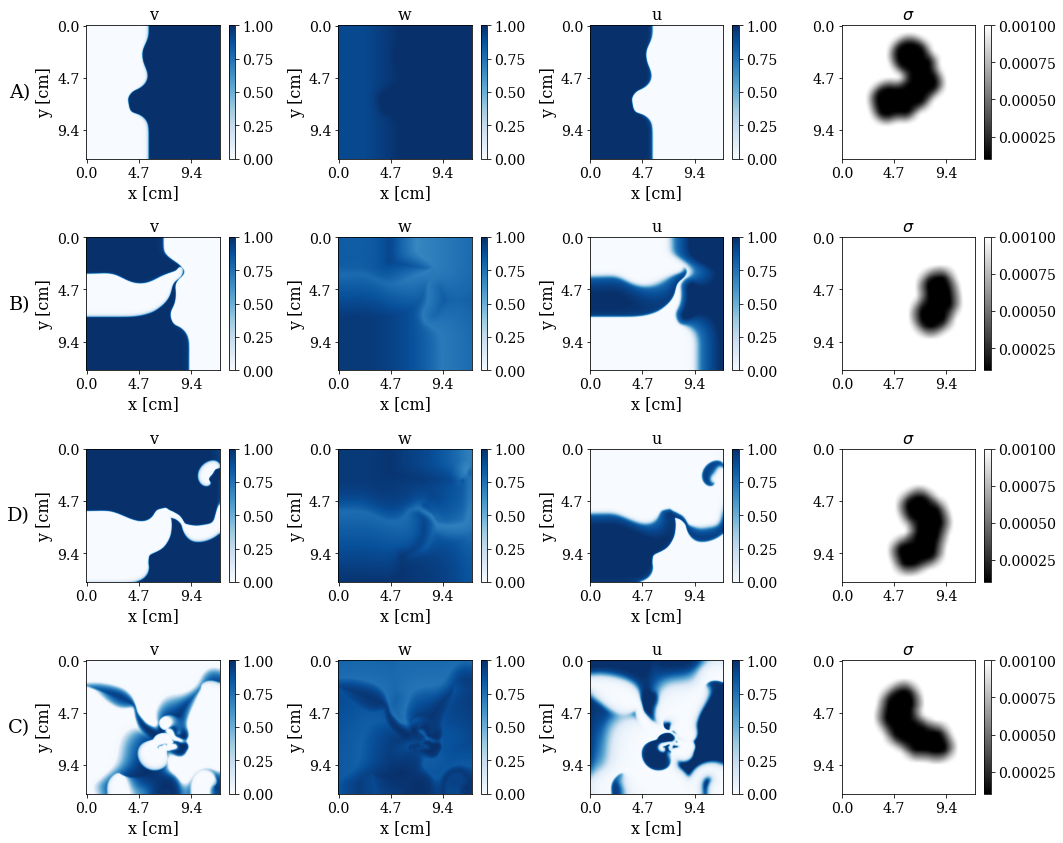

In [2]:
fig, axes = plt.subplots(4, 4, figsize=(15, 12))
pad = 2

def annotate(ax, text):
    ax.annotate(text, xy=(0, 0.5), xytext=(-ax.yaxis.labelpad - pad, 0),
            xycoords=ax.yaxis.label, textcoords='offset points',
            size='large', ha='right', va='center', rotation=0)       


seed = 5
axes_row = axes[0]
with h5py.File("data/cardiax_{}.hdf5".format(seed), "r") as f:
    states = f["states"]
    d = f["diffusivity"]
    idx = 1
    state = cardiax.solve.State(*states[idx])
    cardiax.plot.plot_state(state, d, cmap="Blues", dx=12/256, ax=axes_row)
    annotate(axes_row[0], "A)")  
    
seed = 31
axes_row = axes[1]
with h5py.File("data/cardiax_{}.hdf5".format(seed), "r") as f:
    states = f["states"]
    d = f["diffusivity"]
    idx = 10
    state = cardiax.solve.State(*states[idx])
    cardiax.plot.plot_state(state, d, cmap="Blues", dx=12/256, ax=axes_row)
    annotate(axes_row[0], "B)")
        
seed = 1990
axes_row = axes[2]
with h5py.File("data/cardiax_{}.hdf5".format(seed), "r") as f:
    states = f["states"]
    d = f["diffusivity"]
    idx = 13
    state = cardiax.solve.State(*states[idx])
    cardiax.plot.plot_state(state, d, cmap="Blues", dx=12/256, ax=axes_row)
    annotate(axes_row[0], "D)")
    
seed = 12
axes_row = axes[3]
with h5py.File("data/cardiax_{}.hdf5".format(seed), "r") as f:
    states = f["states"]
    d = f["diffusivity"]
    idx = 30
    state = cardiax.solve.State(*states[24])
    cardiax.plot.plot_state(state, d, cmap="Blues", dx=12/256, ax=axes_row)
    annotate(axes_row[0], "C)")
     
fig.tight_layout()
plt.show()